# Data Processing Pipeline - Hanoi Weather Forecasting

## Step 3: Data Processing & Preprocessing

This notebook implements comprehensive data processing for the Hanoi weather dataset:

### 🎯 Objectives:
1. **Feature Type Determination** - Classify numerical vs categorical features
2. **Missing Value Handling** - Strategic approaches for different feature types
3. **Data Normalization** - Scale features appropriately for ML models
4. **Outlier Detection** - Identify and handle extreme values
5. **Correlation Analysis** - Deep dive into feature relationships
6. **Data Validation** - Ensure data quality for forecasting

### 📊 Processing Pipeline:
Raw Data → Cleaning → Normalization → Feature Selection → Ready for ML

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 6)

print("🔧 Data Processing Libraries loaded successfully!")
print("📊 Ready to process Hanoi weather data for ML modeling")

🔧 Data Processing Libraries loaded successfully!
📊 Ready to process Hanoi weather data for ML modeling


## 1. Load and Examine Data

In [2]:
# Load the dataset
data_path = '../data/raw/Hanoi-Daily-10-years.csv'
df = pd.read_csv(data_path)

print(f"📋 Original Dataset Shape: {df.shape}")
print(f"📅 Date Range: {df['datetime'].min()} to {df['datetime'].max()}")

# Create a copy for processing
df_processed = df.copy()

# Convert datetime
df_processed['datetime'] = pd.to_datetime(df_processed['datetime'])

print("\n✅ Data loaded and datetime converted")
df_processed.head(3)

📋 Original Dataset Shape: (3660, 33)
📅 Date Range: 1/1/2016 to 9/9/2025

✅ Data loaded and datetime converted


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Hanoi,2015-09-20,33.0,26.7,29.3,41.7,30.5,35.4,25.7,81.5,...,12.2,5,NaN,2015-09-20T05:44:39,2015-09-20T17:55:33,0.23,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"48820099999,48823099999,48825099999,4883109999..."
1,Hanoi,2015-09-21,29.5,25.0,26.8,34.4,25.0,29.2,24.3,86.3,...,5.8,3,NaN,2015-09-21T05:44:54,2015-09-21T17:54:36,0.25,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"48820099999,48823099999,48825099999,4883109999..."
2,Hanoi,2015-09-22,28.5,25.0,25.9,32.8,25.0,26.5,24.2,90.5,...,7.2,3,NaN,2015-09-22T05:45:08,2015-09-22T17:53:39,0.30,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"48820099999,48823099999,48825099999,4883109999..."


## 2. Feature Type Classification

In [3]:
# Classify features by type
def classify_features(df):
    """
    Classify features into different types for appropriate processing
    """
    
    # Temporal features
    temporal_features = ['datetime', 'sunrise', 'sunset']
    
    # Target variable
    target_feature = ['temp']
    
    # Temperature-related numerical features
    temperature_features = ['tempmax', 'tempmin', 'feelslike', 'feelslikemax', 'feelslikemin', 'dew']
    
    # Atmospheric numerical features
    atmospheric_features = ['humidity', 'sealevelpressure', 'cloudcover', 'visibility']
    
    # Precipitation numerical features
    precipitation_features = ['precip', 'precipprob', 'precipcover', 'snow', 'snowdepth']
    
    # Wind numerical features
    wind_features = ['windspeed', 'windgust', 'winddir']
    
    # Solar/energy numerical features
    solar_features = ['solarradiation', 'solarenergy', 'uvindex']
    
    # Cyclical features
    cyclical_features = ['moonphase']
    
    # Risk numerical features
    risk_features = ['severerisk']
    
    # Categorical text features
    categorical_features = ['conditions', 'description', 'icon', 'preciptype']
    
    # Identifier features
    identifier_features = ['name', 'stations']
    
    # Combine all numerical features
    numerical_features = (temperature_features + atmospheric_features + 
                         precipitation_features + wind_features + 
                         solar_features + cyclical_features + risk_features)
    
    return {
        'temporal': temporal_features,
        'target': target_feature,
        'temperature': temperature_features,
        'atmospheric': atmospheric_features,
        'precipitation': precipitation_features,
        'wind': wind_features,
        'solar': solar_features,
        'cyclical': cyclical_features,
        'risk': risk_features,
        'categorical': categorical_features,
        'identifier': identifier_features,
        'numerical': numerical_features
    }

# Classify features
feature_types = classify_features(df_processed)

print("📊 Feature Classification:")
for category, features in feature_types.items():
    available_features = [f for f in features if f in df_processed.columns]
    print(f"• {category.capitalize():15s}: {len(available_features):2d} features - {available_features}")

📊 Feature Classification:
• Temporal       :  3 features - ['datetime', 'sunrise', 'sunset']
• Target         :  1 features - ['temp']
• Temperature    :  6 features - ['tempmax', 'tempmin', 'feelslike', 'feelslikemax', 'feelslikemin', 'dew']
• Atmospheric    :  4 features - ['humidity', 'sealevelpressure', 'cloudcover', 'visibility']
• Precipitation  :  5 features - ['precip', 'precipprob', 'precipcover', 'snow', 'snowdepth']
• Wind           :  3 features - ['windspeed', 'windgust', 'winddir']
• Solar          :  3 features - ['solarradiation', 'solarenergy', 'uvindex']
• Cyclical       :  1 features - ['moonphase']
• Risk           :  1 features - ['severerisk']
• Categorical    :  4 features - ['conditions', 'description', 'icon', 'preciptype']
• Identifier     :  2 features - ['name', 'stations']
• Numerical      : 23 features - ['tempmax', 'tempmin', 'feelslike', 'feelslikemax', 'feelslikemin', 'dew', 'humidity', 'sealevelpressure', 'cloudcover', 'visibility', 'precip', 'precippr

## 3. Missing Value Analysis and Handling

🔍 Missing Value Analysis:
                    Column  Missing_Count  Missing_Percentage       Data_Type
severerisk      severerisk           2660           72.677596         float64
preciptype      preciptype            987           26.967213          object
name                  name              0            0.000000          object
tempmin            tempmin              0            0.000000         float64
datetime          datetime              0            0.000000  datetime64[ns]
feelslikemax  feelslikemax              0            0.000000         float64
feelslikemin  feelslikemin              0            0.000000         float64
feelslike        feelslike              0            0.000000         float64
tempmax            tempmax              0            0.000000         float64
dew                    dew              0            0.000000         float64


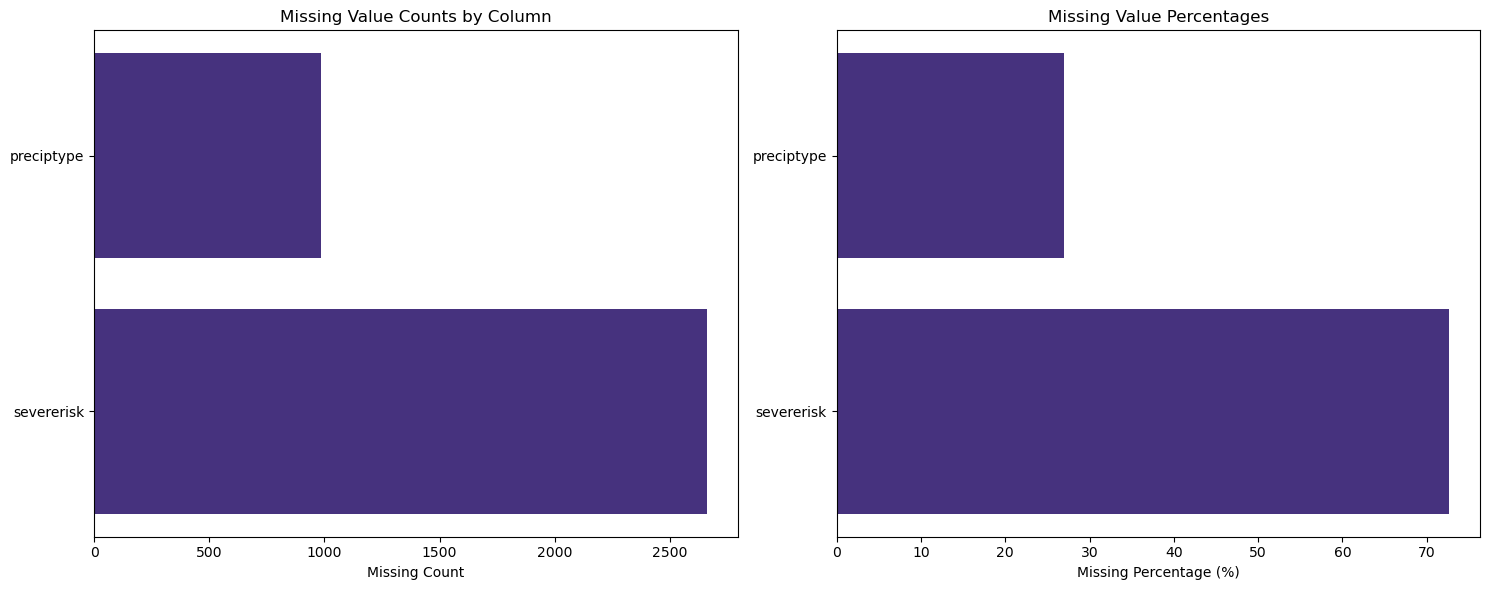


📊 Summary: 2 columns have missing values


In [4]:
# Comprehensive missing value analysis
def analyze_missing_values(df):
    """
    Analyze missing values in the dataset
    """
    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Data_Type': df.dtypes
    })
    
    missing_data = missing_data.sort_values('Missing_Count', ascending=False)
    return missing_data

# Analyze missing values
missing_analysis = analyze_missing_values(df_processed)

print("🔍 Missing Value Analysis:")
print(missing_analysis.head(10))

# Visualize missing values
missing_cols = missing_analysis[missing_analysis['Missing_Count'] > 0]

if len(missing_cols) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Missing value counts
    ax1.barh(missing_cols['Column'], missing_cols['Missing_Count'])
    ax1.set_title('Missing Value Counts by Column')
    ax1.set_xlabel('Missing Count')
    
    # Missing value percentages
    ax2.barh(missing_cols['Column'], missing_cols['Missing_Percentage'])
    ax2.set_title('Missing Value Percentages')
    ax2.set_xlabel('Missing Percentage (%)')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Summary: {len(missing_cols)} columns have missing values")
else:
    print("\n✅ Excellent! No missing values found in the dataset.")

## 4. Outlier Detection and Analysis

In [5]:
# Outlier detection using IQR method
def detect_outliers_iqr(df, column):
    """
    Detect outliers using Interquartile Range method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Analyze outliers for key numerical features
key_features = ['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed']

outlier_summary = {}

print("🔍 Outlier Analysis for Key Features:")
print("=" * 50)

for feature in key_features:
    if feature in df_processed.columns:
        outliers, lower, upper = detect_outliers_iqr(df_processed, feature)
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df_processed)) * 100
        
        outlier_summary[feature] = {
            'count': outlier_count,
            'percentage': outlier_percentage,
            'lower_bound': lower,
            'upper_bound': upper
        }
        
        print(f"• {feature:12s}: {outlier_count:4d} outliers ({outlier_percentage:5.2f}%) | Range: [{lower:.2f}, {upper:.2f}]")

print("=" * 50)

🔍 Outlier Analysis for Key Features:
• temp        :    3 outliers ( 0.08%) | Range: [9.15, 40.75]
• tempmax     :    3 outliers ( 0.08%) | Range: [10.75, 46.35]
• tempmin     :    1 outliers ( 0.03%) | Range: [6.00, 38.00]
• humidity    :   87 outliers ( 2.38%) | Range: [51.40, 106.60]
• precip      :  601 outliers (16.42%) | Range: [-3.75, 6.25]
• windspeed   :   54 outliers ( 1.48%) | Range: [4.00, 30.40]


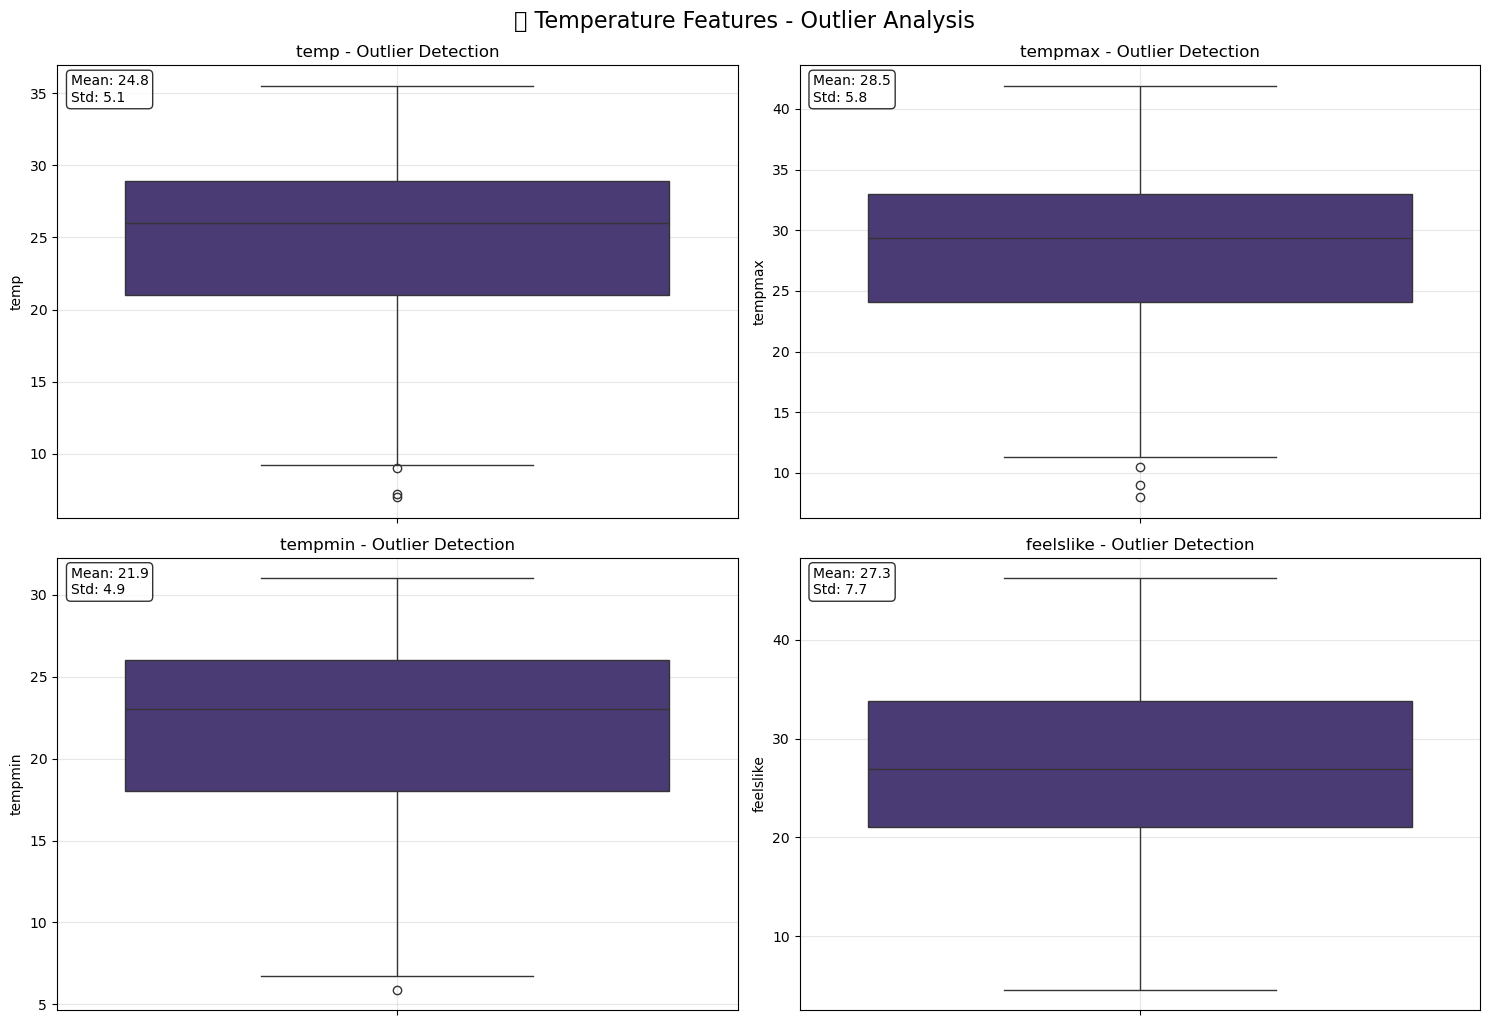

In [6]:
# Visualize outliers for temperature features
temp_features = ['temp', 'tempmax', 'tempmin', 'feelslike']
available_temp_features = [f for f in temp_features if f in df_processed.columns]

if available_temp_features:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, feature in enumerate(available_temp_features[:4]):
        # Box plot
        sns.boxplot(data=df_processed, y=feature, ax=axes[i])
        axes[i].set_title(f'{feature} - Outlier Detection')
        axes[i].grid(True, alpha=0.3)
        
        # Add statistics
        stats_text = f"Mean: {df_processed[feature].mean():.1f}\nStd: {df_processed[feature].std():.1f}"
        axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.suptitle('🌡️ Temperature Features - Outlier Analysis', y=1.02, fontsize=16)
    plt.show()

## 5. Data Normalization and Scaling

In [7]:
# Prepare numerical features for normalization
numerical_features = feature_types['numerical']
available_numerical = [f for f in numerical_features if f in df_processed.columns]

print(f"📊 Preparing {len(available_numerical)} numerical features for scaling:")
print(available_numerical)

# Create a copy for normalization
df_normalized = df_processed.copy()

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Apply different scaling methods
scaling_results = {}

# StandardScaler (mean=0, std=1)
df_standard = df_processed.copy()
df_standard[available_numerical] = standard_scaler.fit_transform(df_processed[available_numerical])
scaling_results['standard'] = df_standard

# MinMaxScaler (0 to 1)
df_minmax = df_processed.copy()
df_minmax[available_numerical] = minmax_scaler.fit_transform(df_processed[available_numerical])
scaling_results['minmax'] = df_minmax

# RobustScaler (median and IQR)
df_robust = df_processed.copy()
df_robust[available_numerical] = robust_scaler.fit_transform(df_processed[available_numerical])
scaling_results['robust'] = df_robust

print("\n✅ Applied three scaling methods: Standard, MinMax, and Robust")

📊 Preparing 23 numerical features for scaling:
['tempmax', 'tempmin', 'feelslike', 'feelslikemax', 'feelslikemin', 'dew', 'humidity', 'sealevelpressure', 'cloudcover', 'visibility', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windspeed', 'windgust', 'winddir', 'solarradiation', 'solarenergy', 'uvindex', 'moonphase', 'severerisk']

✅ Applied three scaling methods: Standard, MinMax, and Robust


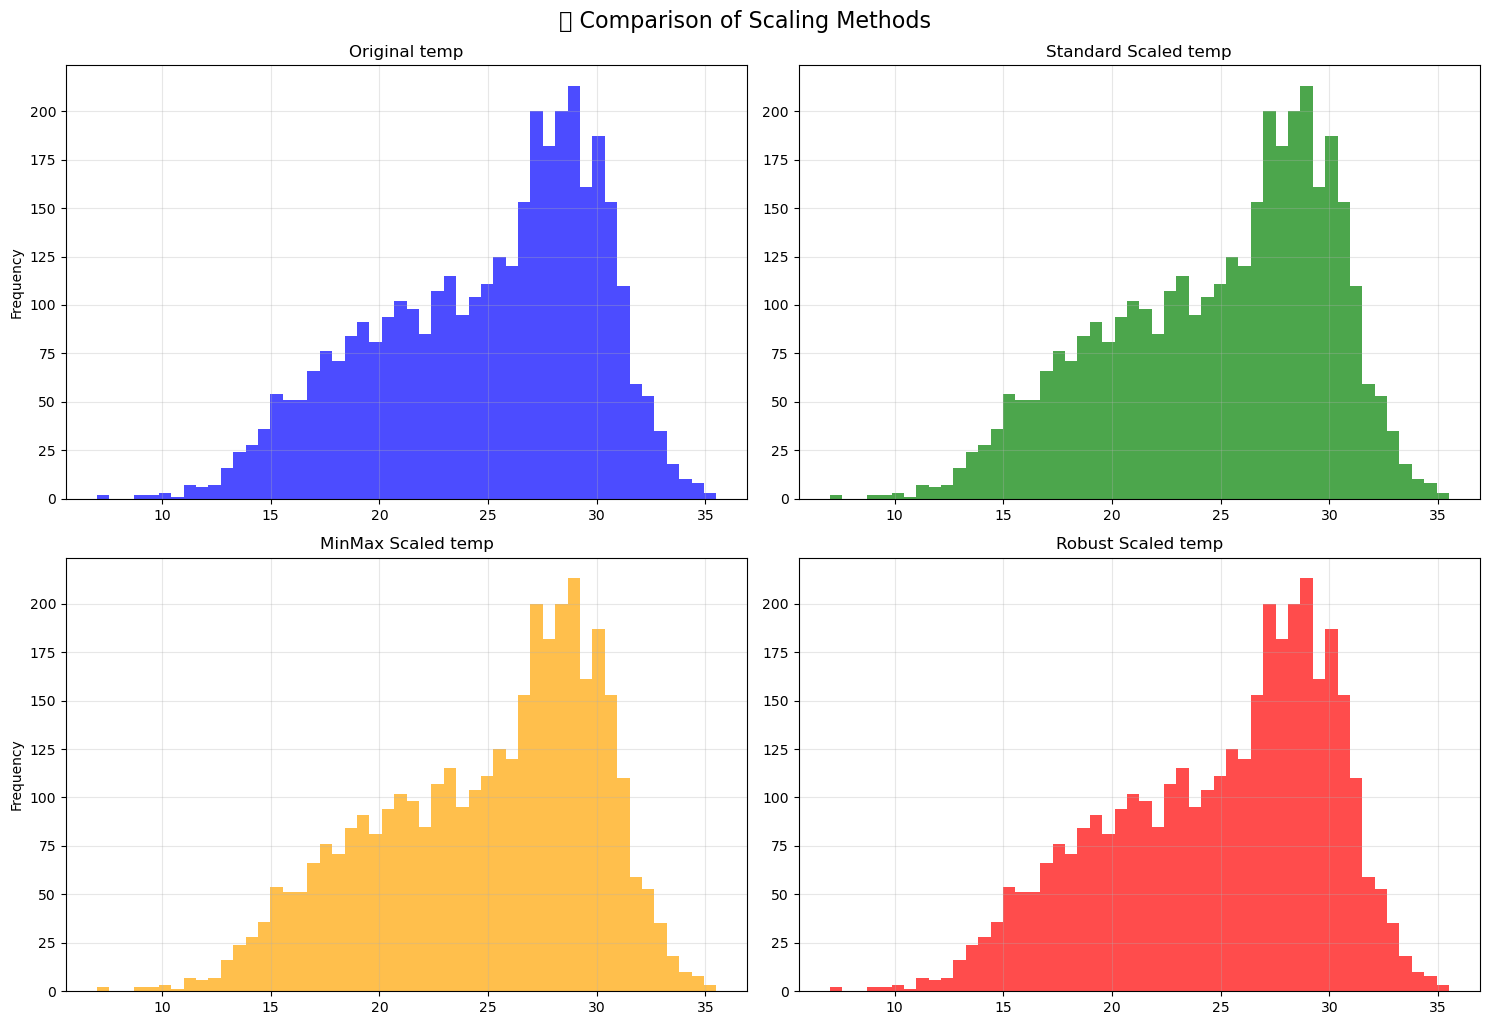


📊 Scaling Statistics Comparison:
      Original  Standard   MinMax   Robust
Mean   24.8444   24.8444  24.8444  24.8444
Std     5.1119    5.1119   5.1119   5.1119


In [8]:
# Compare scaling methods visually
feature_to_compare = 'temp'

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# Original data
axes[0].hist(df_processed[feature_to_compare], bins=50, alpha=0.7, color='blue')
axes[0].set_title(f'Original {feature_to_compare}')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Standard scaling
axes[1].hist(df_standard[feature_to_compare], bins=50, alpha=0.7, color='green')
axes[1].set_title(f'Standard Scaled {feature_to_compare}')
axes[1].grid(True, alpha=0.3)

# MinMax scaling
axes[2].hist(df_minmax[feature_to_compare], bins=50, alpha=0.7, color='orange')
axes[2].set_title(f'MinMax Scaled {feature_to_compare}')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, alpha=0.3)

# Robust scaling
axes[3].hist(df_robust[feature_to_compare], bins=50, alpha=0.7, color='red')
axes[3].set_title(f'Robust Scaled {feature_to_compare}')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('🔧 Comparison of Scaling Methods', y=1.02, fontsize=16)
plt.show()

# Print scaling statistics
print("\n📊 Scaling Statistics Comparison:")
scaling_stats = pd.DataFrame({
    'Original': [df_processed[feature_to_compare].mean(), df_processed[feature_to_compare].std()],
    'Standard': [df_standard[feature_to_compare].mean(), df_standard[feature_to_compare].std()],
    'MinMax': [df_minmax[feature_to_compare].mean(), df_minmax[feature_to_compare].std()],
    'Robust': [df_robust[feature_to_compare].mean(), df_robust[feature_to_compare].std()]
}, index=['Mean', 'Std'])

print(scaling_stats.round(4))

## 6. Enhanced Correlation Analysis

In [9]:
# Compute correlation matrix for normalized data
correlation_matrix = df_standard[available_numerical + ['temp']].corr()

# Temperature correlations
temp_correlations = correlation_matrix['temp'].abs().sort_values(ascending=False)

print("🔗 Top 15 Features Correlated with Temperature:")
print("=" * 50)
for i, (feature, corr) in enumerate(temp_correlations.head(15).items(), 1):
    if feature != 'temp':
        direction = "📈" if correlation_matrix.loc[feature, 'temp'] > 0 else "📉"
        print(f"{i:2d}. {feature:20s}: {direction} {corr:.4f}")

print("=" * 50)

🔗 Top 15 Features Correlated with Temperature:
 2. tempmax             : 📈 0.9774
 3. feelslike           : 📈 0.9739
 4. tempmin             : 📈 0.9694
 5. feelslikemax        : 📈 0.9575
 6. feelslikemin        : 📈 0.9427
 7. dew                 : 📈 0.9031
 8. sealevelpressure    : 📉 0.8675
 9. severerisk          : 📈 0.6478
10. solarradiation      : 📈 0.6155
11. solarenergy         : 📈 0.6153
12. uvindex             : 📈 0.5805
13. visibility          : 📈 0.3804
14. cloudcover          : 📉 0.2348
15. winddir             : 📈 0.1658


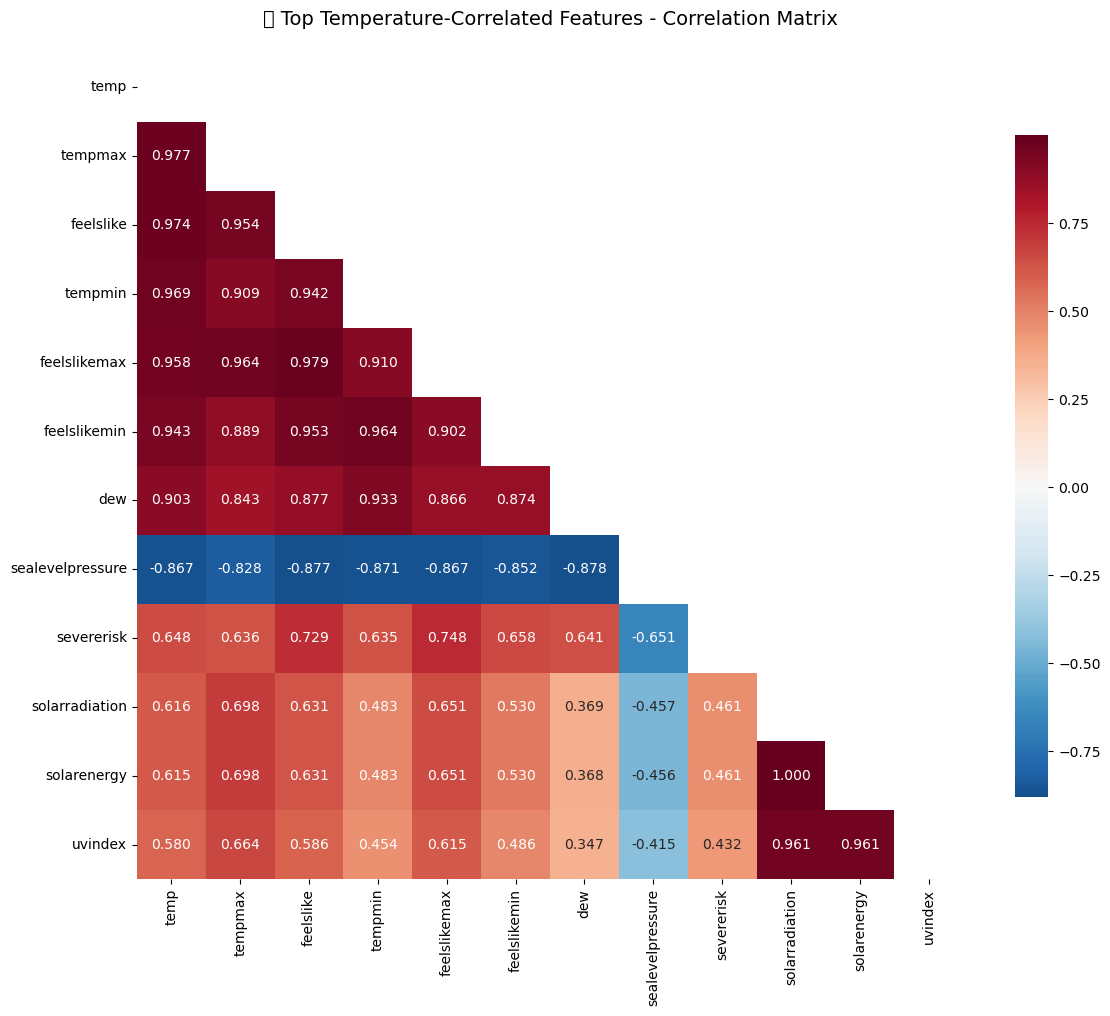


⚠️  Highly Correlated Feature Pairs (>0.8):
• solarradiation ↔ solarenergy: 1.000
• feelslike ↔ feelslikemax: 0.979
• temp ↔ tempmax: 0.977
• temp ↔ feelslike: 0.974
• temp ↔ tempmin: 0.969
• tempmax ↔ feelslikemax: 0.964
• tempmin ↔ feelslikemin: 0.964
• solarradiation ↔ uvindex: 0.961
• solarenergy ↔ uvindex: 0.961
• temp ↔ feelslikemax: 0.958
• tempmax ↔ feelslike: 0.954
• feelslike ↔ feelslikemin: 0.953
• temp ↔ feelslikemin: 0.943
• feelslike ↔ tempmin: 0.942
• tempmin ↔ dew: 0.933
• tempmin ↔ feelslikemax: 0.910
• tempmax ↔ tempmin: 0.909
• temp ↔ dew: 0.903
• feelslikemax ↔ feelslikemin: 0.902
• tempmax ↔ feelslikemin: 0.889
• dew ↔ sealevelpressure: 0.878
• feelslike ↔ sealevelpressure: 0.877
• feelslike ↔ dew: 0.877
• feelslikemin ↔ dew: 0.874
• tempmin ↔ sealevelpressure: 0.871
• temp ↔ sealevelpressure: 0.867
• feelslikemax ↔ sealevelpressure: 0.867
• feelslikemax ↔ dew: 0.866
• feelslikemin ↔ sealevelpressure: 0.852
• tempmax ↔ dew: 0.843
• tempmax ↔ sealevelpressure: 0.82

In [10]:
# Create a focused correlation heatmap
# Select top correlated features with temperature
top_features = temp_correlations.head(12).index.tolist()
correlation_subset = correlation_matrix.loc[top_features, top_features]

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_subset, dtype=bool))
sns.heatmap(
    correlation_subset,
    annot=True,
    cmap='RdBu_r',
    center=0,
    mask=mask,
    square=True,
    fmt='.3f',
    cbar_kws={'shrink': 0.8}
)
plt.title('🔗 Top Temperature-Correlated Features - Correlation Matrix', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Identify feature groups with high internal correlation
high_corr_pairs = []
for i in range(len(correlation_subset.columns)):
    for j in range(i+1, len(correlation_subset.columns)):
        corr_value = abs(correlation_subset.iloc[i, j])
        if corr_value > 0.8:  # High correlation threshold
            high_corr_pairs.append((
                correlation_subset.columns[i],
                correlation_subset.columns[j],
                corr_value
            ))

if high_corr_pairs:
    print("\n⚠️  Highly Correlated Feature Pairs (>0.8):")
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: x[2], reverse=True):
        print(f"• {feat1} ↔ {feat2}: {corr:.3f}")
    print("\n💡 Consider feature selection to reduce multicollinearity")
else:
    print("\n✅ No extremely high correlations (>0.8) found between features")

In [12]:
# Final feature set overview
all_final_feature = [
    'datetime', 'temp', 'tempmax', 'tempmin', 'feelslike', 'feelslikemax', 'feelslikemin',
    'dew', 'humidity', 'sealevelpressure', 'cloudcover', 'visibility', 'precip', 'precipprob',
    'precipcover', 'snow', 'snowdepth', 'windspeed', 'windgust', 'winddir', 'solarradiation',
    'solarenergy', 'uvindex', 'moonphase', 'severerisk', 'conditions', 'icon'
]
print(f"\n🎯 Final Feature Set ({len(all_final_feature)} features):")


🎯 Final Feature Set (27 features):
